In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stats_df = pd.read_csv('all_stats.csv')
stats_df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,26.0,LAL,82.0,82.0,33.0,4.7,9.8,0.478,...,1990,0.0,Los Angeles Lakers,63.0,19.0,0.768,0.0,110.7,103.9,6.74
1,Byron Scott,SG,28.0,LAL,77.0,77.0,33.7,6.1,13.1,0.470,...,1990,0.0,Los Angeles Lakers,63.0,19.0,0.768,0.0,110.7,103.9,6.74
2,James Worthy,SF,28.0,LAL,80.0,80.0,37.0,8.9,16.2,0.548,...,1990,0.0,Los Angeles Lakers,63.0,19.0,0.768,0.0,110.7,103.9,6.74
3,Jawann Oldham,C,32.0,LAL,6.0,0.0,7.5,0.5,1.0,0.500,...,1990,0.0,Los Angeles Lakers,63.0,19.0,0.768,0.0,110.7,103.9,6.74
4,Jay Vincent,SF,30.0,LAL,41.0,6.0,11.2,2.1,4.5,0.470,...,1990,0.0,Los Angeles Lakers,63.0,19.0,0.768,0.0,110.7,103.9,6.74


In [3]:
top_scorers = stats_df.sort_values('PTS', ascending=False)[:10]
top_scorers

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Year,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
10448,James Harden,PG,29.0,HOU,78.0,78.0,36.8,10.8,24.5,0.442,...,2019,0.768,Houston Rockets,53.0,29.0,0.646,0.0,113.9,109.1,4.96
1519,Kobe Bryant,SG,27.0,LAL,80.0,80.0,41.0,12.2,27.2,0.450,...,2006,0.386,Los Angeles Lakers,45.0,37.0,0.549,9.0,99.4,96.9,2.53
10465,James Harden,SG,30.0,HOU,68.0,68.0,36.5,9.9,22.3,0.444,...,2020,0.363,Houston Rockets,44.0,28.0,0.611,0.0,117.8,114.8,3.13
10726,Michael Jordan,SG,26.0,CHI,82.0,82.0,39.0,12.6,24.0,0.526,...,1990,0.613,Chicago Bulls,55.0,27.0,0.671,4.0,109.5,106.2,2.74
5617,Allen Iverson,PG,30.0,PHI,72.0,72.0,43.1,11.3,25.3,0.447,...,2006,0.001,Philadelphia 76ers,38.0,44.0,0.463,11.0,99.4,101.3,-2.10
10763,Michael Jordan,SG,29.0,CHI,78.0,78.0,39.3,12.7,25.7,0.495,...,1993,0.577,Chicago Bulls,57.0,25.0,0.695,0.0,105.2,98.9,6.19
7989,Tracy McGrady,SG,23.0,ORL,75.0,74.0,39.4,11.1,24.2,0.457,...,2003,0.359,Orlando Magic,42.0,40.0,0.512,7.0,98.5,98.4,-0.39
7358,Kevin Durant,SF,25.0,OKC,81.0,81.0,38.5,10.5,20.8,0.503,...,2014,0.986,Oklahoma City Thunder,59.0,23.0,0.720,0.0,106.2,99.8,6.66
4821,Stephen Curry,PG,32.0,GSW,63.0,63.0,34.2,10.4,21.7,0.482,...,2021,0.449,Golden State Warriors,39.0,33.0,0.542,12.0,113.7,112.7,1.10
1533,Kobe Bryant,SG,28.0,LAL,77.0,77.0,40.8,10.6,22.8,0.463,...,2007,0.404,Los Angeles Lakers,42.0,40.0,0.512,19.0,103.3,103.4,0.24


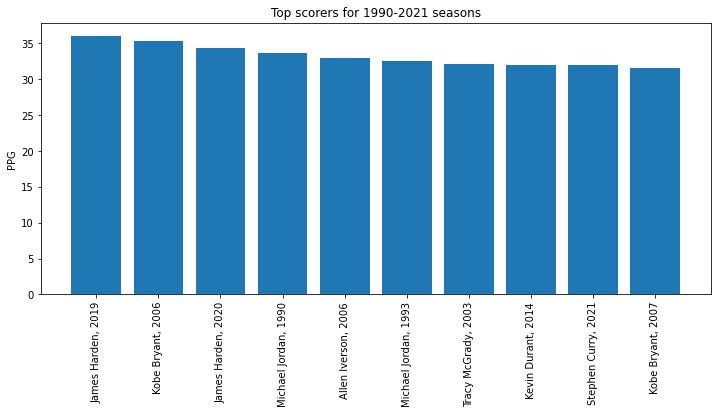

In [4]:
name_year = top_scorers['Player'].to_numpy() + ', ' + top_scorers['Year'].to_numpy().astype('str')
points = top_scorers['PTS'].to_numpy()
plt.figure(figsize=(12,5)) 
plt.bar(name_year, points)
plt.xticks(rotation=90)
plt.ylabel('PPG')
plt.title('Top scorers for 1990-2021 seasons')
plt.show()

In [5]:
top_scorers_by_year = stats_df.groupby('Year').apply(lambda x: x.sort_values('PTS', ascending=False).head(1))

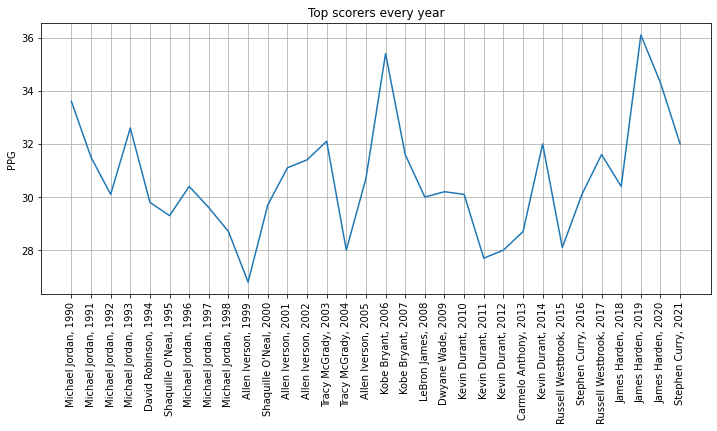

In [6]:
name_year = top_scorers_by_year['Player'].to_numpy() + ', ' + top_scorers_by_year['Year'].to_numpy().astype('str')
points = top_scorers_by_year['PTS'].to_numpy()
plt.figure(figsize=(12,5)) 
plt.plot(name_year, points)
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('PPG')
plt.title('Top scorers every year')
plt.show()

In [7]:
corr = stats_df.corr()['Share'].sort_values(ascending=False)
corr.drop('Share', axis=0, inplace=True)
corr

FTA     0.323007
FT      0.318354
PTS     0.288913
FG      0.276206
2P      0.275106
2PA     0.250508
FGA     0.248946
TOV     0.233996
DRB     0.213704
AST     0.200680
TRB     0.187410
STL     0.177614
GS      0.168042
MP      0.162873
BLK     0.153658
W/L%    0.128320
W       0.124399
SRS     0.124241
ORB     0.104105
3PA     0.096655
3P      0.096353
G       0.089532
PF      0.072145
FG%     0.067102
2P%     0.064795
eFG%    0.060929
PS/G    0.043897
FT%     0.038711
Age     0.018429
3P%     0.014703
Year   -0.008576
PA/G   -0.040977
GB     -0.102414
L      -0.123574
Name: Share, dtype: float64

<AxesSubplot:>

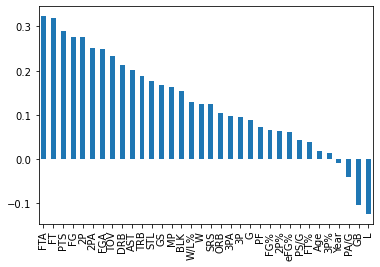

In [8]:
corr.plot.bar()